## Метрики моделей классификации 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
import sklearn
from sklearn.datasets import load_iris


print("версия pandas:", pd.__version__)
print("версия sklearn:", sklearn.__version__)

версия pandas: 1.4.3
версия sklearn: 1.1.1


# Посмотрим на стандартные датасеты и их стуктуру

In [2]:
iris_dataset=load_iris()
print("Ключи load_dataset:\n", iris_dataset.keys())

Ключи load_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print("Ключи feature_names:\n", iris_dataset['feature_names'])
print("Ключи data:\n", iris_dataset['data'])

Ключи feature_names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Ключи data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.

In [5]:
print("Ключи feature_names:\n", iris_dataset['target'])
print("Ключи data:\n", iris_dataset['target_names'])

Ключи feature_names:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Ключи data:
 ['setosa' 'versicolor' 'virginica']


In [6]:
iris_df=pd.DataFrame(iris_dataset['data'],columns=iris_dataset.feature_names)
display(iris_df.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
dict_class=dict(zip(range(3),iris_dataset['target_names']))

df_full=pd.concat([pd.DataFrame(iris_dataset['target'],columns=['class']), 
                   iris_df], axis=1).replace({'class': dict_class})
df_full.tail()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3
149,virginica,5.9,3.0,5.1,1.8


# 1. Разделим набор данных на тренировочный и тестовый набор

Обратите внимание, что делим данные `np.array` данные могут быть также в формате `pd.DataFrame`.</br>
Важное замечание - порядок строк не важен, совсем не важен. По идее, это должно быть вам понятно.

[ссылка на справку `train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=42)

In [9]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)

X_train (112, 4)
y_train (112,)


In [10]:
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_test (38, 4)
y_test (38,)


In [11]:
y_train

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

In [12]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [13]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([15, 11, 12]))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                                    stratify = iris_dataset['target'], random_state=42)

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([12, 13, 13]))

# 2. Предсказание
## 2.1. Самое простое предсказание

Метод `fit` предназначен для сопоставления строк данных целевым значениям на основе заданного алгоритма

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knk = KNeighborsClassifier()
knk.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knk.predict(X_test)
print('Правильность на тестовом наборе: {:.3f}'.format(np.mean(y_pred==y_test)))

Правильность на тестовом наборе: 0.974


In [17]:
knk_train = knk.score(X_train , y_train)
knk_test = knk.score(X_test , y_test)
print("тренировочный: {:.3f}".format(knk_train))
print("тестовый:      {:.3f}".format(knk_test))

тренировочный: 0.973
тестовый:      0.974


## 2.2 Предсказание с  кросс-валидацией

Важно! Кросс-валидация для большинства алгоритмов это единственный способ проверить ваш алгоритм и прооверить его настройки. 

### 2.2.1 `cross_val_score`

Позволяет используя заданный метод валидации разделить тренировочный набор (train) на обучающий и поверочный, обучится на поверочном наборе и оценить разультат обучения на поверочной части. 

Выводится результат проверки на поверочной части.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knk = KNeighborsClassifier()

# по умолчанию метод K-fold 
val_score = cross_val_score(knk, X_train, y_train, cv=5)
np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:", val_score)

Значения правильности перекрестной проверки: [0.9565 1.     0.9091 1.     0.9091]


In [19]:
from sklearn.model_selection import ShuffleSplit

knk = KNeighborsClassifier()

# заданный метод кросс-валидации с перемешиванием
shuffle_split = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 3, random_state = 42)
cross_vall = cross_val_score(knk, X_train, y_train, cv=shuffle_split)

np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:",cross_vall)

Значения правильности перекрестной проверки: [1.     0.9412 0.9412]


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

knk = KNeighborsClassifier()

# заданный метод кросс-валидации с перемешиванием и стратификацией
strat_shuffle_split = StratifiedShuffleSplit(n_splits = 3, random_state = 42)
cross_vall = cross_val_score(knk, X_train, y_train, cv = strat_shuffle_split)

np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:",cross_vall)

Значения правильности перекрестной проверки: [0.9167 1.     1.    ]


### 2.2.2 `cross_val_predict`

Возможно использовать только если при кросс-валидации при которой, каждая строка выбирается единственным способом. В практике используется редко.

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit, KFold

knk = KNeighborsClassifier()
#shuffle_split = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 3, random_state = 42)
kfold_split = KFold(n_splits = 3, random_state = 42, shuffle=True)

y_pred_train = cross_val_predict(knk, X_train, y_train, cv=kfold_split)

### 2.2.3 `cross_validate`

Можно заглянуть "под капот"

In [22]:
from sklearn.model_selection import cross_validate

knk = KNeighborsClassifier()
cv_results = cross_validate(knk, X_train, y_train, cv=3)
cv_results

{'fit_time': array([0.0004, 0.0004, 0.0003]),
 'score_time': array([0.0023, 0.0013, 0.0015]),
 'test_score': array([0.9211, 0.9189, 0.9459])}

In [23]:
cv_results = cross_validate(knk, X_train, y_train, cv=3, return_train_score=True, return_estimator=True)
cv_results

{'fit_time': array([0.0004, 0.0003, 0.0004]),
 'score_time': array([0.002 , 0.0012, 0.0015]),
 'estimator': [KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier()],
 'test_score': array([0.9211, 0.9189, 0.9459]),
 'train_score': array([0.973 , 0.9867, 0.9733])}

Важная опция! Посмотрите [справку](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) раздел `Returns::`, таким образом можно ознакомится с дополнительными значениями возвращаемыми функцией.

In [24]:
cv_results['estimator']

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 3, random_state = 42)

cv_results = cross_validate(knk, X_train, y_train, cv=shuffle_split, scoring=('accuracy','balanced_accuracy'))
cv_results

{'fit_time': array([0.0004, 0.0003, 0.0003]),
 'score_time': array([0.0021, 0.0018, 0.0015]),
 'test_accuracy': array([1.    , 0.9412, 0.9412]),
 'test_balanced_accuracy': array([1.    , 0.9524, 0.9389])}

**Важно для понимания!** слово *train* и слово *test* это __обучающий__ и __поверочный набор__ из тренировочного набора! </br>
Одни и теже слова имеют разное значение в разных ситуациях!!! Как говорится "следите за руками"!!!

## 2.3 Решетчатый поиск с кросс-валидацией

Поиск оптимальных параметров

In [26]:
from sklearn.model_selection import GridSearchCV

knk = KNeighborsClassifier()
param_grid = [{
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'p': [1,2,3]
}]

cv = KFold()

grid = GridSearchCV(knk, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3]}],
             return_train_score=True)

In [27]:
grid.cv_results_

{'mean_fit_time': array([0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
        0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
        0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
        0.0003, 0.0002, 0.0003, 0.0002, 0.0002, 0.0003]),
 'std_fit_time': array([9.6593e-05, 6.0185e-05, 3.0807e-06, 1.8032e-06, 2.9908e-06,
        1.5321e-05, 2.0044e-05, 1.0184e-05, 1.4274e-05, 1.2399e-05,
        9.1012e-06, 5.2365e-05, 4.1647e-05, 1.5326e-05, 6.8163e-06,
        8.0987e-06, 3.2341e-07, 5.0161e-06, 1.8749e-06, 4.5697e-06,
        8.4764e-07, 2.4435e-06, 1.3317e-06, 1.2848e-06, 1.2848e-06,
        1.6408e-06, 1.5786e-06, 1.0490e-06, 1.4927e-06, 2.0398e-06]),
 'mean_score_time': array([0.0011, 0.0009, 0.0009, 0.0008, 0.0008, 0.001 , 0.0009, 0.0009,
        0.001 , 0.001 , 0.0008, 0.001 , 0.0009, 0.0009, 0.001 , 0.0009,
        0.0008, 0.001 , 0.0009, 0.0008, 0.0009, 0.0008, 0.0008, 0.0009,
        0.0009, 0.0008, 0.0009, 0.0008, 0.0008, 

In [28]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,28,29,19,21,22,25,27,20,23,26,...,0,6,7,5,3,8,4,9,10,11
mean_fit_time,0.000246,0.000256,0.000257,0.000253,0.000254,0.000248,0.000248,0.000262,0.000261,0.000256,...,0.00036,0.000288,0.000269,0.000286,0.000258,0.00028,0.000261,0.000274,0.000264,0.000304
std_fit_time,0.000001,0.000002,0.000005,0.000002,0.000001,0.000002,0.000001,0.000001,0.000001,0.000002,...,0.000097,0.00002,0.00001,0.000015,0.000002,0.000014,0.000003,0.000012,0.000009,0.000052
mean_score_time,0.000837,0.000937,0.000834,0.000848,0.00083,0.000811,0.000833,0.000916,0.000923,0.000897,...,0.001082,0.000912,0.000881,0.000961,0.000833,0.000973,0.000835,0.000995,0.000836,0.000966
std_score_time,0.000044,0.000058,0.000017,0.000055,0.000011,0.000012,0.000033,0.000007,0.000021,0.000015,...,0.00032,0.000068,0.00006,0.000036,0.000011,0.000052,0.000007,0.000177,0.000015,0.000082
param_n_neighbors,10,10,7,8,8,9,10,7,8,9,...,1,3,3,2,2,3,2,4,4,4
param_p,2,3,2,1,2,2,1,3,3,3,...,1,1,2,3,1,3,2,1,2,3
params,"{'n_neighbors': 10, 'p': 2}","{'n_neighbors': 10, 'p': 3}","{'n_neighbors': 7, 'p': 2}","{'n_neighbors': 8, 'p': 1}","{'n_neighbors': 8, 'p': 2}","{'n_neighbors': 9, 'p': 2}","{'n_neighbors': 10, 'p': 1}","{'n_neighbors': 7, 'p': 3}","{'n_neighbors': 8, 'p': 3}","{'n_neighbors': 9, 'p': 3}",...,"{'n_neighbors': 1, 'p': 1}","{'n_neighbors': 3, 'p': 1}","{'n_neighbors': 3, 'p': 2}","{'n_neighbors': 2, 'p': 3}","{'n_neighbors': 2, 'p': 1}","{'n_neighbors': 3, 'p': 3}","{'n_neighbors': 2, 'p': 2}","{'n_neighbors': 4, 'p': 1}","{'n_neighbors': 4, 'p': 2}","{'n_neighbors': 4, 'p': 3}"
split0_test_score,0.956522,0.913043,0.956522,0.956522,0.956522,0.956522,0.956522,0.913043,0.913043,0.913043,...,1.0,1.0,1.0,0.913043,0.956522,1.0,0.913043,0.913043,0.913043,0.913043
split1_test_score,0.956522,1.0,1.0,1.0,1.0,1.0,0.956522,1.0,1.0,1.0,...,0.956522,0.956522,0.956522,0.956522,0.956522,0.956522,0.956522,0.956522,0.956522,0.956522
split2_test_score,0.954545,0.954545,0.909091,0.954545,0.909091,0.909091,0.954545,0.909091,0.909091,0.909091,...,0.909091,0.909091,0.909091,0.909091,0.909091,0.863636,0.909091,0.909091,0.909091,0.909091


In [29]:
best_model = grid.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=10)

In [30]:
grid.cv_results_['params'][28]

{'n_neighbors': 10, 'p': 2}

**Важный комментарий!** Плохо если лучшее решение упирается в границу выбранного диапазона. В нашем случае мы уперлись в границу 10 соседей. У нас нет уверенности, что дальше нет лучшего решения. Можно строить валидацию, а можно построить валидационную кривую если остается подобрать только один параметр. 

В нашем случае, мы построим кривую, но это вожет не являтся лучшим решением проблем, так как мы не занимаемся подбором остальных параметров.

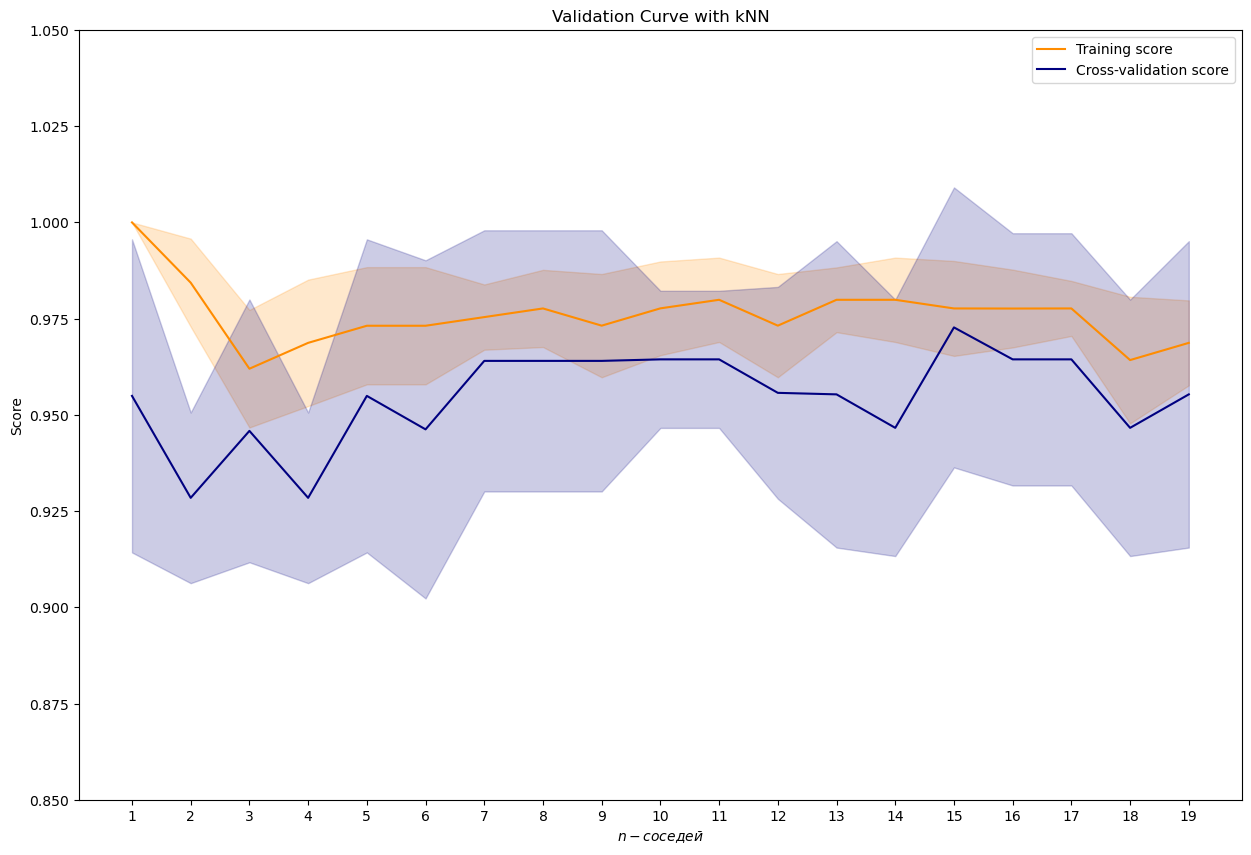

In [31]:
from sklearn.model_selection import validation_curve

n_range = np.arange(1,20)

train_scores, test_scores = validation_curve(
    knk, X_train, y_train,
    param_name="n_neighbors", 
    param_range=n_range,
    cv=KFold(), 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.85, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.xticks(n_range)
plt.legend(loc="best")
plt.show()

### Финальный вариант построения модели

In [32]:
knk_final = KNeighborsClassifier(n_neighbors=15, p=2)
knk_final.fit(X_train,y_train)

y_predict = knk_final.predict(X_test)
print('Предсказанные результаты: ', y_predict)

print('Оценка на тренировочном наборе: ', knk_final.score(X_train,y_train))
print('Оценка на тестовом наборе: ', knk_final.score(X_test,y_test))

Предсказанные результаты:  [0 1 1 1 0 1 2 2 2 2 1 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 2 2 2 0 0 0 0 2
 1]
Оценка на тренировочном наборе:  0.9821428571428571
Оценка на тестовом наборе:  0.9473684210526315


### А теперь попробуем другое перемешивание

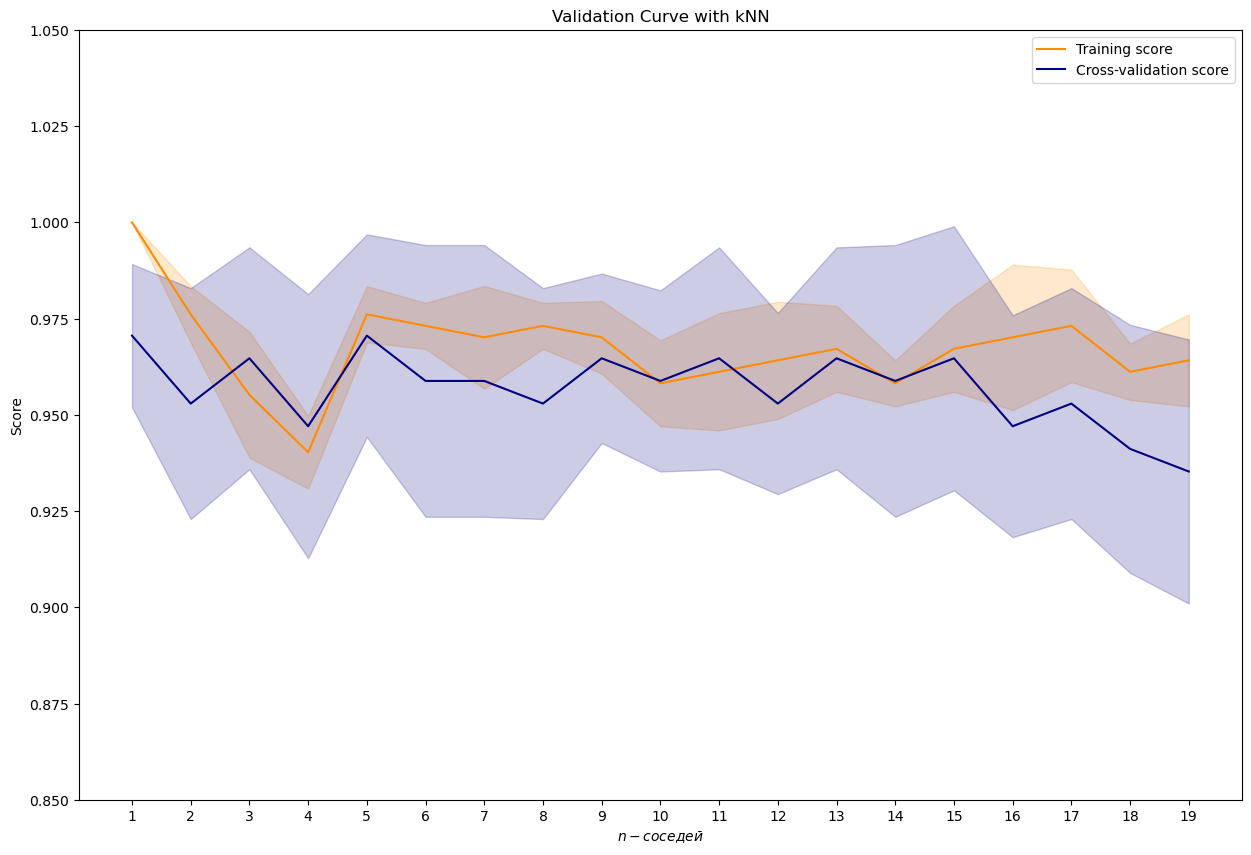

In [33]:
from sklearn.model_selection import validation_curve

n_range = np.arange(1,20)

train_scores, test_scores = validation_curve(
    knk, X_train, y_train,
    param_name="n_neighbors", 
    param_range=n_range,
    cv = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42), 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.85, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.legend(loc="best")
plt.xticks(n_range)
plt.show()

In [34]:
knk_final = KNeighborsClassifier(n_neighbors = ??, p = 2)
knk_final.fit(X_train,y_train)

y_predict = knk_final.predict(X_test)
print('Предсказанные результаты: ', y_predict)

print('Оценка на тренировочном наборе: ', knk_final.score(X_train,y_train))
print('Оценка на тестовом наборе: ', knk_final.score(X_test,y_test))

SyntaxError: invalid syntax (835486979.py, line 1)

# Какую  систематические ошибку мы совершили в нашем решении?

Масштабирование
